In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import get_train_results, add_subplot
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

k=0.1: pearson coefs= 0.9999446433379031
k=0.5: pearson coefs= 0.9999931034377465
k=5.0: pearson coefs= 0.9999998189265547
k=10.0: pearson coefs= 0.9999998070549088


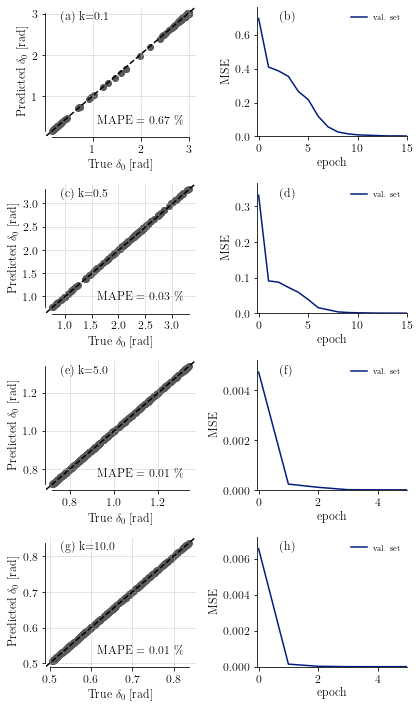

In [8]:
#fig, axs = plt.subplots(1, 1, figsize=set_size(345, fraction=1, subplots=(2, 4)))
fig, axs = plt.subplots(4, 2, figsize=(6, 10))

model_name = 'cnn'

# k=0.1
y_test, predictions, history = get_train_results(model_name, "k0.1")
print('k=0.1: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

xmax = 15
xmin = -xmax/100
add_subplot(axs, 0, y_test, predictions, history, epoch_xlim=(xmin, xmax), str_labels=('(a) k=0.1', '(b)'), nticks=6)

# k=0.5
y_test, predictions, history = get_train_results(model_name, "k0.5")
print('k=0.5: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

xmax = 15
xmin = -xmax/100
add_subplot(axs, 1, y_test, predictions, history, epoch_xlim=(xmin, xmax), str_labels=('(c) k=0.5', '(d)'), nticks=6)

# k=5.0
y_test, predictions, history = get_train_results(model_name, "k5.0")
print('k=5.0: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

xmax = 5
xmin = -xmax/100
add_subplot(axs, 2, y_test, predictions, history, epoch_xlim=(xmin, xmax), str_labels=('(e) k=5.0', '(f)'), nticks=6)

# k=10.0
y_test, predictions, history = get_train_results(model_name, "k10.0")
print('k=10.0: pearson coefs=', stats.pearsonr(y_test, predictions)[0])

xmax = 5
xmin = -xmax/100
add_subplot(axs, 3, y_test, predictions, history, epoch_xlim=(xmin, xmax), str_labels=('(g) k=10.0', '(h)'), nticks=6)

plt.tight_layout()
plt.savefig('output/'+model_name+'/exp_cos_delta0_scatter.pdf', format='pdf')
plt.show()